In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("./Lab Session Data.xlsx",sheet_name = None);

In [3]:
pdata = df['Purchase data'].iloc[:,0:5]
pdata

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [4]:
A = np.array(pdata.iloc[:,1:4])
A

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]])

In [5]:
C = np.array(pdata.iloc[:,4])
s = C.shape[0]
C = C.reshape(s,1)
C

array([[386],
       [289],
       [393],
       [110],
       [280],
       [167],
       [271],
       [274],
       [148],
       [198]])

In [6]:
dimensionality = A.shape[1]
print("Dimensionality:",dimensionality)

Dimensionality: 3


In [7]:
#Finding rank
np.linalg.matrix_rank(A)

3

In [8]:
inv = np.linalg.pinv(A)
cost = np.matmul(inv,C)
cost

array([[ 1.],
       [55.],
       [18.]])

In [9]:
d = {"Product":["Candies","Mangoes","Milk Packets"],
     "cost":np.ndarray.tolist(cost.ravel())
    }
ans = pd.DataFrame(d)
ans

,Product,cost
0,Candies,1.0
1,Mangoes,55.0
2,Milk Packets,18.0


In [10]:
pdata['status'] = ['Rich' if x > 200 else 'Poor' for x in pdata['Payment (Rs)']]
pdata

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),status
0,C_1,20,6,2,386,Rich
1,C_2,16,3,6,289,Rich
2,C_3,27,6,2,393,Rich
3,C_4,19,1,2,110,Poor
4,C_5,24,4,2,280,Rich
5,C_6,22,1,5,167,Poor
6,C_7,15,4,2,271,Rich
7,C_8,18,4,2,274,Rich
8,C_9,21,1,4,148,Poor
9,C_10,16,2,4,198,Poor


In [11]:
irctcdata = df["IRCTC Stock Price"]
irctcdata

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [12]:
price = irctcdata['Price']

In [13]:
import statistics as st

In [14]:
mprice = st.mean(price)
mprice

1560.663453815261

In [15]:
var = st.variance(price)
var

58732.365352539186

In [16]:
def getMeanofDay(Day):
    Daydata = irctcdata[ irctcdata["Day"] == Day]['Price']
    Daymean = st.mean(Daydata)
    return Daymean

In [17]:
print(getMeanofDay("Wed"))

1550.706


In [18]:
print(getMeanofDay("Thu"))

1541.856


In [19]:
#probability of loss
perchange = irctcdata['Chg%']
totalcount = perchange.size
negcount = perchange[perchange<0].size
prob = negcount/totalcount * 100
print(prob,"%")

49.79919678714859 %


In [20]:
#probability of profit on wednesday
mask1 = irctcdata['Chg%']>0
mask2 = irctcdata['Day'] == "Wed"

wedprofitdayscount = irctcdata[mask1 & mask2].shape[0]
weddayscount = irctcdata[mask2].shape[0]
prob_of_wedprofit = wedprofitdayscount / weddayscount
print(prob_of_wedprofit*100,"%")

42.0 %


In [21]:
#Conditional probability
prob_of_both = wedprofitdayscount/totalcount
prob_of_wed = (1/5)
con_prob = prob_of_both/prob_of_wed* 100
print(con_prob,"%")
print(prob_of_both)

42.16867469879518 %
0.08433734939759036


<Axes: xlabel='Day', ylabel='Chg%'>

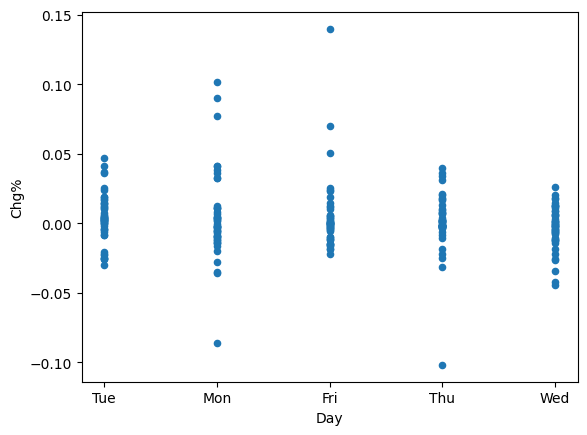

In [22]:
irctcdata.plot(x = "Day",y = "Chg%",kind = "scatter")

In [23]:
#Data Exploration
thyroid_data = df['thyroid0387_UCI']
thyroid_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S


In [24]:
#A5
#categorizing data
numeric_columns = thyroid_data.select_dtypes(include=['number']).columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print()
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Record ID', 'age'], dtype='object')

Categorical Columns: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [25]:
thyroid_data.replace("?",np.nan,inplace = True)

/tmp/ipykernel_38317/4093021968.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_data.replace("?",np.nan,inplace = True)


In [26]:
thyroid_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [27]:
numeric_df = thyroid_data.select_dtypes(include=['number'])
numeric_df.head()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
0,840801013,29,0.3,NaN,NaN,NaN,NaN,NaN
1,840801014,29,1.6,1.9,128.0,NaN,NaN,NaN
2,840801042,41,NaN,NaN,NaN,NaN,NaN,11.0
3,840803046,36,NaN,NaN,NaN,NaN,NaN,26.0
4,840803047,32,NaN,NaN,NaN,NaN,NaN,36.0


In [28]:
def getrange_emptycount(colname):
    print(colname,"range:", numeric_df[colname].max() - numeric_df[colname].min())
    print(colname,"emptycount:",numeric_df[colname].isnull().sum(),"\n")

In [29]:
for column in numeric_df.columns:
    getrange_emptycount(column)

Record ID range: 29318022
Record ID emptycount: 0 

age range: 65525
age emptycount: 0 

TSH range: 529.995
TSH emptycount: 842 

T3 range: 17.95
T3 emptycount: 2604 

TT4 range: 598.0
TT4 emptycount: 442 

T4U range: 2.16
T4U emptycount: 809 

FTI range: 879.6
FTI emptycount: 802 

TBG range: 199.9
TBG emptycount: 8823 



In [30]:
import matplotlib.pyplot as plt

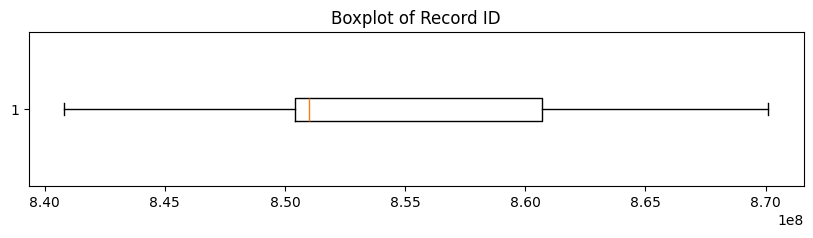

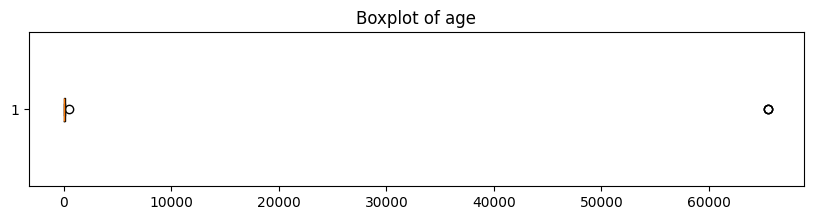

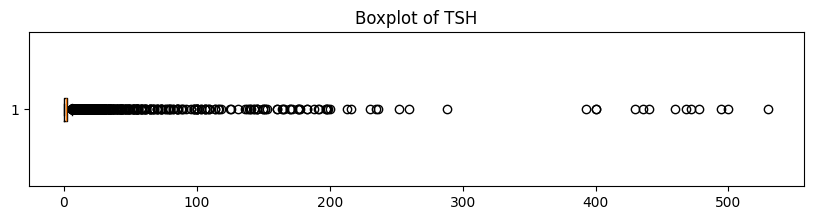

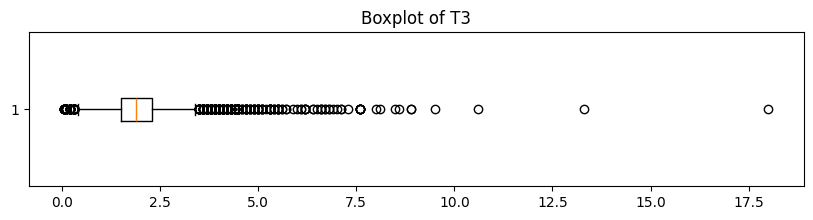

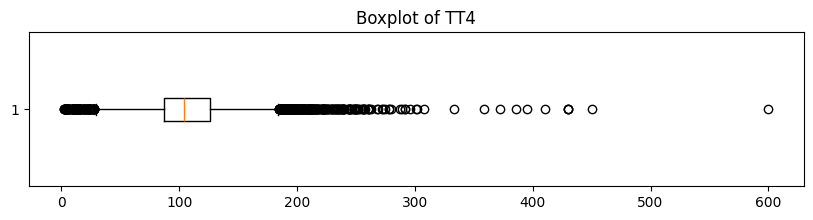

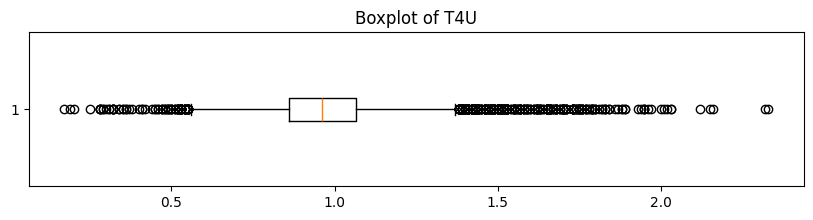

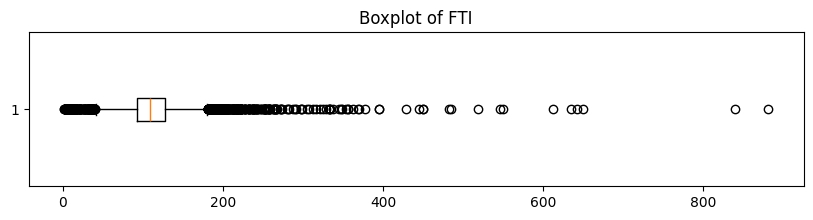

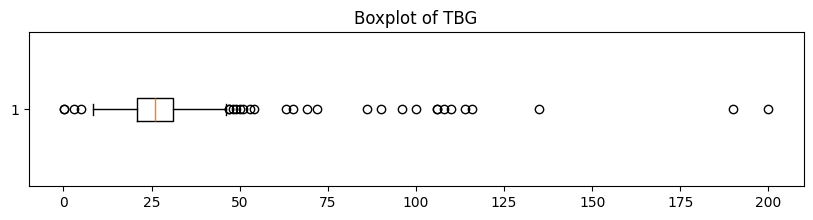

In [31]:
for column in numeric_df.columns:
    plt.figure(figsize=(10, 2))
    plt.boxplot(numeric_df[column].dropna(),vert=False)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [32]:
def mean_variance(column):
    print(column,"\nmean:",numeric_df[column].mean(),"\nvariance:",numeric_df[column].var(),"\n")

In [33]:
for column in numeric_df.columns:
    mean_variance(column)

Record ID 
mean: 852947346.6122983 
variance: 57486250586150.28 

age 
mean: 73.55582206716092 
variance: 1401800.868871345 

TSH 
mean: 5.218402753781513 
variance: 584.8661532092907 

T3 
mean: 1.970628805724726 
variance: 0.7877961683561557 

TT4 
mean: 108.70030469644902 
variance: 1407.950791475485 

T4U 
mean: 0.9760557216309935 
variance: 0.04014430639006457 

FTI 
mean: 113.64074551935484 
variance: 1726.5395850611546 

TBG 
mean: 29.87005729512894 
variance: 444.3876429994665 



In [34]:
#outlier presence
def check_present(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    bound1 = q1-1.5*iqr
    bound2 = q3+1.5*iqr
    val =len(df[ (df[column]<bound1) | (df[column]>bound2) ])
    if val == 0:
        return False
    else:
        return True

In [35]:
#Impute missing values
for column in thyroid_data.columns:
    if thyroid_data[column].isnull().sum() > 0:
        if thyroid_data[column].dtype == 'object':
            thyroid_data[column].fillna(thyroid_data[column].mode()[0], inplace=True)
        else:
            if check_present(thyroid_data,column):
                thyroid_data[column].fillna(thyroid_data[column].median(), inplace=True)
            else:
                thyroid_data[column].fillna(thyroid_data[column].mean(), inplace=True)
thyroid_data.head()

/tmp/ipykernel_38317/2192064766.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  thyroid_data[column].fillna(thyroid_data[column].mode()[0], inplace=True)
/tmp/ipykernel_38317/2192064766.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S


In [36]:
def normalize(df,column):
    min_val = np.min(df[column])
    max_val = np.max(df[column])
    normalized_column = [(x - min_val) / (max_val - min_val) for x in df[column]]
    return normalized_column

numeric_columns = thyroid_data.select_dtypes(include=['number']).columns
# Normalize each numeric column
normalized_data = thyroid_data.copy()
for column in numeric_columns:
    normalized_data[column] = normalize(normalized_data,column)

# Display normalized data (or specific normalized columns)
normalized_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,f,0.129565,other,NO CONDITION
1,3.410871e-08,0.000427,F,f,f,f,f,f,f,f,...,t,0.210702,f,0.365741,f,0.122328,f,0.129565,other,NO CONDITION
2,9.891527e-07,0.000610,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,t,0.054527,other,NO CONDITION
3,6.934301e-05,0.000534,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,t,0.129565,other,NO CONDITION
4,6.937712e-05,0.000473,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,t,0.179590,other,S


In [37]:
#accessing two observations
binary_attr = []
for column in thyroid_data.columns:
    if(len(pd.unique(thyroid_data[column])) == 2):
        binary_attr.append(column)

binary_df = thyroid_data[binary_attr]

for column in binary_df.columns:
    unilist = pd.unique(binary_df[column])
    unilist.sort()
    newcolvalue = [ False if x == unilist[0] else True for x in binary_df[column]]
    binary_df.loc[:,column] = newcolvalue

vec1 = binary_df.iloc[0]
vec2 = binary_df.iloc[1]

f11 = sum(vec1 & vec2)
f01_10 = sum(vec1 ^ vec2)
f00 = sum(~(vec1 | vec2))

jc = f11/(f01_10 + f11)
smc = (f00 + f11)/(f00 + f01_10 + f11)
print("jaccard coeff:",jc);
print("Simple Matching coeff:",smc)

jaccard coeff: 0.25
Simple Matching coeff: 0.8571428571428571


In [38]:
#cosine similarity
import math

v1 = normalized_data.iloc[0]
v2 = normalized_data.iloc[1]
for x in vec1.index:
    v1[x] = 1 if vec1[x] == True else 0
    v2[x] = 1 if vec2[x] == True else 0

v1 = v1[1:-2]
v2 = v2[1:-2]
def cosine_similarity(v1,v2):
    dot_pro = sum([x*y for x,y in zip(v1,v2)])
    magv1 = getlen(v1)
    magv2 = getlen(v2)
    return dot_pro/(magv1*magv2)
def getlen(v):
    magv = math.sqrt(sum([x**2 for x in v]))
    return magv

print("cosine similarity measure:",cosine_similarity(v1,v2))

cosine similarity measure: 0.4548200422912813


/tmp/ipykernel_38317/86911981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1[x] = 1 if vec1[x] == True else 0
/tmp/ipykernel_38317/86911981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2[x] = 1 if vec2[x] == True else 0


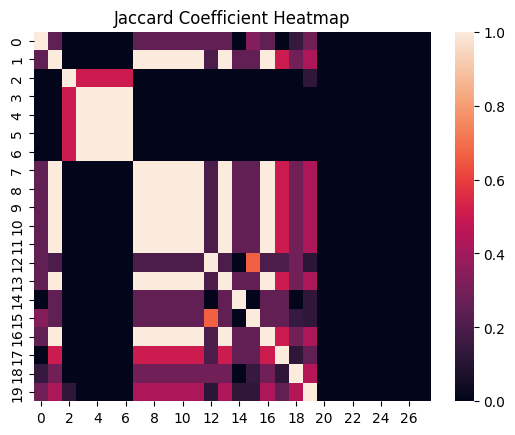

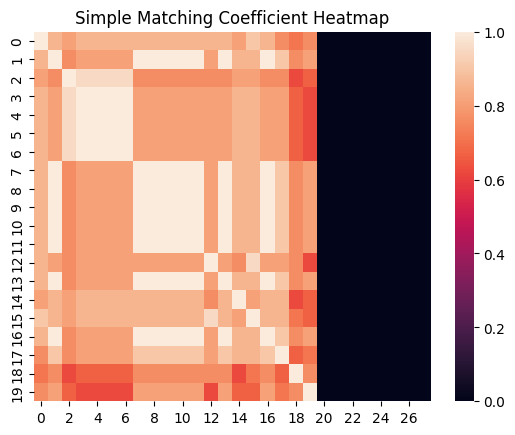

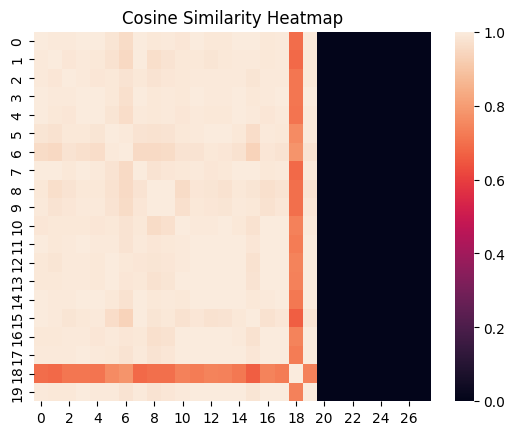

In [48]:
import seaborn as sns
# Select the first 20 observations
subset_data = thyroid_data.iloc[:20,1:-2]


for i in range(0,20):
    for column in binary_df.columns:
        subset_data.loc[i,column] = 1 if binary_df.loc[i,column] == True else 0

# Initialize matrices for JC, SMC, and Cosine Similarity
jc_matrix = np.zeros((20,len(subset_data.columns)))
smc_matrix = np.zeros((20,len(subset_data.columns)))
cos_matrix = np.zeros((20, len(subset_data.columns)))

# Calculate JC, SMC, and COS for each pair of vectors
for i in range(20):
    for j in range(i,20):
        vec1 = subset_data.loc[i,binary_attr]
        vec2 = subset_data.loc[j,binary_attr]
        # JC Calculation
        f11 = sum(vec1 & vec2)
        f01_10 = sum(vec1 ^ vec2)
        f00 = sum(~(vec1 | vec2))
                  
        denominator_jc = (f01_10 + f11)
        if denominator_jc == 0:
            jc_matrix[i, j] = jc_matrix[j, i] = 0  # Symmetric matrix
        else:
            jc_matrix[i, j] = jc_matrix[j, i] = f11 / denominator_jc  # Symmetric matrix
        
        # SMC Calculation
        denominator_smc = (f00 + f01_10 + f11)
        if denominator_smc == 0:
            smc_matrix[i, j] = smc_matrix[j, i] = 0  # Symmetric matrix
        else:
            smc_matrix[i, j] = smc_matrix[j, i] = (f11 + f00) / denominator_smc  # Symmetric matrix
        
        # Cosine Similarity Calculation
        vec1 = subset_data.iloc[i]
        vec2 = subset_data.iloc[j]
        cos_matrix[i, j] = cos_matrix[j, i] = cosine_similarity(vec1, vec2)  # Symmetric matrix

# Plot Heatmaps
sns.heatmap(jc_matrix)
plt.title('Jaccard Coefficient Heatmap')
plt.show()

sns.heatmap(smc_matrix)
plt.title('Simple Matching Coefficient Heatmap')
plt.show()

sns.heatmap(cos_matrix)
plt.title('Cosine Similarity Heatmap')
plt.show()
